In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Load the contact map at 10K resolution

size = 248956422  # chr1
resolution = 10000
file = '/nfs/turbo/umms-drjieliu/proj/4dn/data/bulkHiC/GM12878/GM_chr1_KR_10K.txt'

mat = np.zeros((size // resolution, size // resolution))
total = 0

for line in open(file):
    p1, p2, v = line.strip().split()
    p1, p2 = int(p1) // resolution, int(p2) // resolution
    if v.lower() == 'nan':
        continue
    v = float(v)
    mat[p1, p2] += v
    if p1 != p2:
        mat[p2, p1] += v
    total += v

print(total)
print(mat[1000:1020, 1000:1020])

241628555.29057994
[[2231.283     884.66156   495.29337   307.82095   224.91815   200.06519
   158.36627   147.01848   144.97697   141.75316   123.03802   126.616714
   116.20216   105.13105   109.95466   102.03564   102.18796    85.98552
    82.75726    80.142845]
 [ 884.66156  2261.4124    915.3212    388.70532   249.51184   203.17339
   202.96231   166.10918   150.68431   129.47975   120.09655   138.75484
   108.35232   110.52945   116.64094   107.45538    97.04006    71.34844
    79.85694    94.15845 ]
 [ 495.29337   915.3212   2125.1584    724.131     393.06012   272.6423
   198.72353   200.32324   165.75446   129.35536   130.0609    149.88058
   112.48983   119.18701   106.41907   123.42184    89.069725   93.86653
    92.207245   79.63428 ]
 [ 307.82095   388.70532   724.131    1777.1246    925.2593    476.6959
   321.9506    281.68045   225.98651   202.47862   178.07918   145.24089
   126.07468   120.11375   125.207085  110.02437   125.47794    90.16056
   105.11223    91.22789 

In [23]:
def visualize(start, end):
    resolution = 10000
    st, ed = start // resolution, end // resolution
    sub_mat = mat[st:ed, st:ed]
    sub_mat = np.log(sub_mat + 1)
    
    st_Mb, ed_Mb = start // 1000000 if start % 1000000 == 0 else start // 1000000 + 1, end // 1000000
    tick_labels = np.arange(st_Mb, ed_Mb + 1)
    ticks = (tick_labels * 1000000 - start) // resolution
    tick_labels = [str(elm) + ' Mb' for elm in tick_labels]
    # print(tick_labels, ticks)
    
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(sub_mat, square=True, cmap='Reds', vmin=0, yticklabels=tick_labels, xticklabels=tick_labels)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    plt.show()

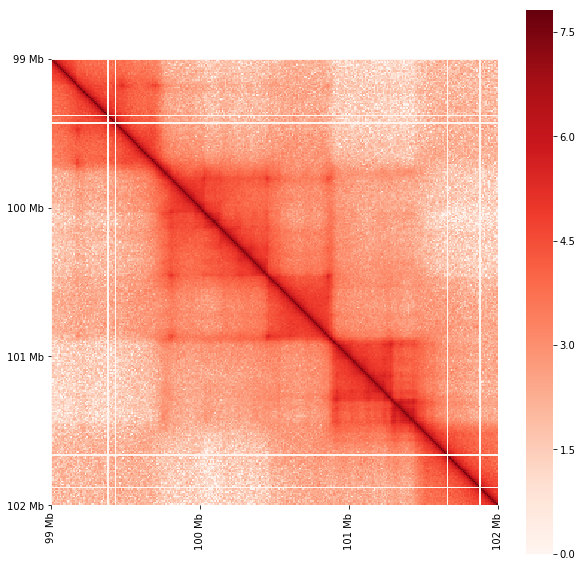

In [24]:
visualize(99000000, 102000000)

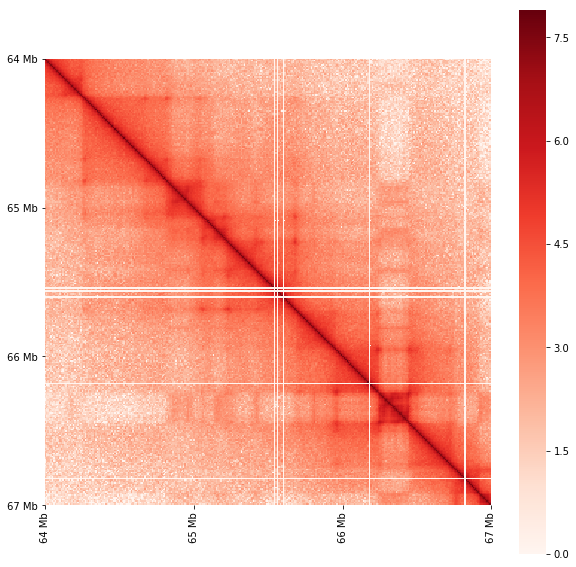

In [25]:
visualize(64000000, 67000000)

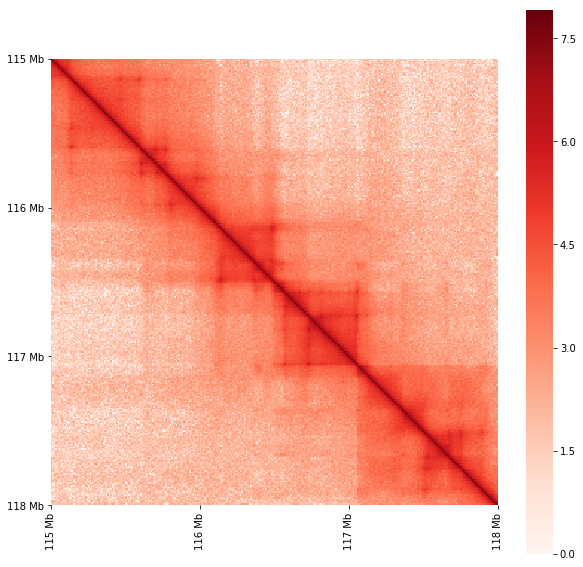

In [26]:
visualize(115000000, 118000000)

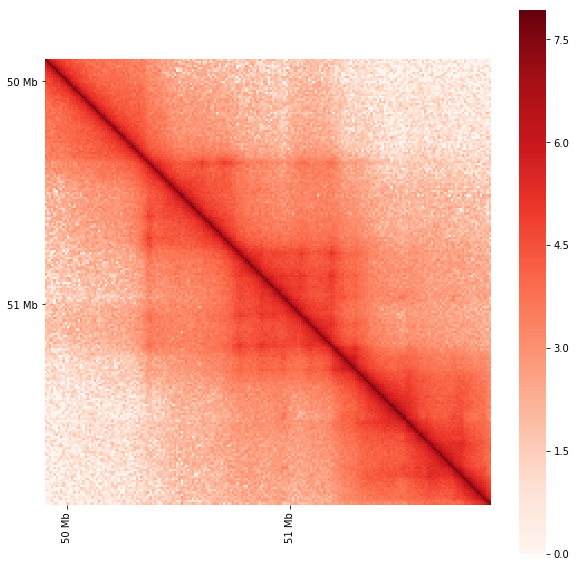

In [39]:
visualize(49900000, 51900000)

In [46]:
def visualize2(start, end):
    resolution = 10000
    st, ed = start // resolution, end // resolution
    sub_mat = mat[st:ed, st:ed]
    sub_mat = np.log(sub_mat + 1)
    
    st_Mb, ed_Mb = start // 500000 if start % 500000 == 0 else start // 500000 + 1, end // 500000
    tick_labels = np.arange(st_Mb, ed_Mb + 1)
    ticks = (tick_labels * 500000 - start) // resolution
    tick_labels = [str(elm // 2) + ' Mb' if elm % 2 == 0 else str(elm // 2) + '.5 Mb' for elm in tick_labels]
    # print(tick_labels, ticks)
    
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(sub_mat, square=True, cmap='Reds', vmin=0, vmax=np.quantile(sub_mat, 0.98), yticklabels=tick_labels, xticklabels=tick_labels)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    plt.show()

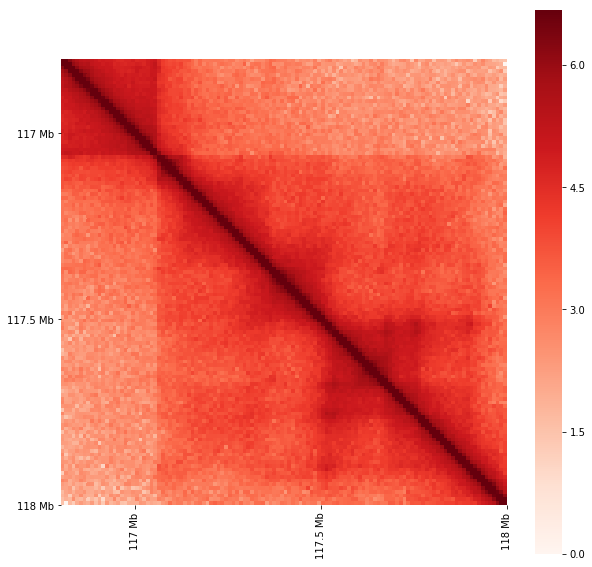

In [90]:
visualize2(116800000, 118000000)

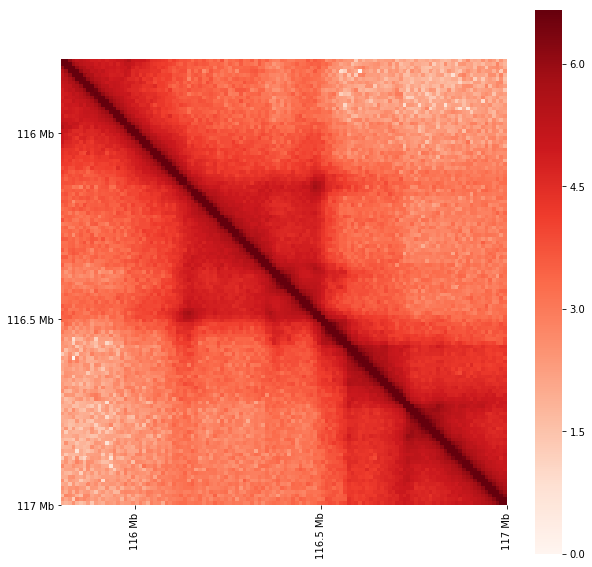

In [95]:
visualize2(115800000, 117000000)

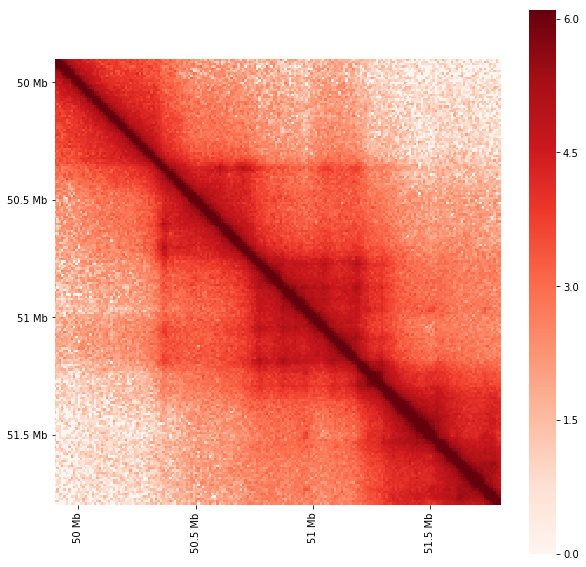

In [49]:
visualize2(49900000, 51800000)

In [58]:
st, ed = 49900000 // resolution, 52800000 // resolution
current_mat = mat[st:ed, st:ed]
print(current_mat.shape)

(290, 290)


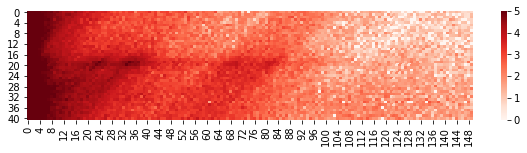

In [71]:
cand_region = np.array([current_mat[i, i:i+150] for i in range(27, 68)])

plt.figure(figsize=(10, 2))
sns.heatmap(np.log(cand_region + 1), cmap='Reds', vmin=0, vmax=5)
plt.show()

In [72]:
print(cand_region.shape)
sum_rows = np.sum(cand_region[:, 10:], axis=1)
print(sum_rows.shape)
print(sum_rows)

(41, 150)
(41,)
[1951.98237336 1927.9113278  1887.5737854  1859.8344386  1670.880271
 1720.97357773 1655.339475   1634.4014851  1610.0992114  1685.4494908
 1681.0853314  1686.74035742 1730.73484185 1826.60314084 1966.10642849
 2118.94220168 2417.95332975 2876.5966019  3442.97237223 4548.85665895
 4573.0215828  3778.5534615  3522.47844047 3373.6920575  3332.67329214
 3453.309954   3501.79246847 3362.53689457 3412.7050681  3476.596535
 3386.668177   3365.7983336  3210.9014863  3346.794902   2911.61188
 3118.6515258  3024.2559738  2863.2851633  2929.929209   2838.5778222
 2872.5895857 ]


In [76]:
window = 10

all_mlogp = []

for i in range(150):
    center = cand_region[19:22, max(0, i - 1 - window):min(150, i + 2 + window)]
    center = np.median(center)
    upper = cand_region[9:19, max(0, i - 1 - window):min(150, i + 2 + window)]
    lower = cand_region[22:32, max(0, i - 1 - window):min(150, i + 2 + window)]
    upper, lower = np.mean(upper), np.mean(lower)
    
    Poiss = scipy.stats.poisson(max(upper, lower))
    p_val = 1 - Poiss.cdf(center)
    
    mlogp = - np.log10(p_val)
    
    print(i, center, upper, lower, mlogp)
    all_mlogp.append(mlogp)

0 162.98587 306.80528706666666 355.9583723833333 -0.0
1 160.15714 287.63337539230776 336.6262641615385 -0.0
2 139.57430499999998 270.9655651071429 319.4237103142857 -0.0
3 129.42053 256.2626038733333 304.4775765333333 -0.0
4 120.08299 243.26369334999998 291.09934571875 -0.0
5 114.80391 231.43836339411766 279.2576454764706 -0.0
6 106.25315499999999 220.77338220555555 268.52835311111113 -0.0
7 104.964424 211.09102145263162 258.64335990526314 -0.0
8 98.87007 202.24808280000002 249.81037656 -0.0
9 98.55785 194.32669017619048 241.50401760952383 -0.0
10 96.4244825 187.14541027272728 234.17702874999998 -0.0
11 98.55785 180.6709490695652 227.20276604347828 -0.0
12 96.85896 111.49349779565217 156.34320676086958 5.983788828279792e-08
13 95.990005 83.30584534347825 126.32579366521739 0.0009449842079326193
14 93.63857 70.19018001304347 112.01548226086956 0.016431001118872746
15 91.89726 62.015970626086954 102.44037051739129 0.0650574219981272
16 86.53009 56.39441197826086 96.44032076521738 0.07340

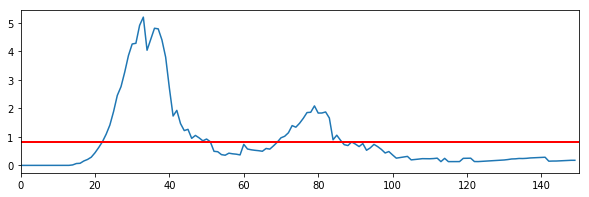

In [79]:
plt.figure(figsize=(10, 3))
plt.plot(np.arange(150), all_mlogp)
plt.axhline(-np.log10(0.15), c='red', lw=2)
plt.xlim([0, 150])
plt.show()

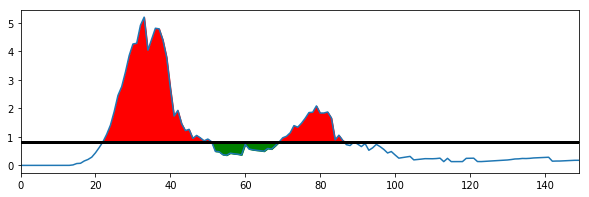

In [85]:
thr = 0.15

plt.figure(figsize=(10, 3))
plt.plot(np.arange(150), all_mlogp)

y1 = [max(elm, -np.log10(thr)) for elm in all_mlogp]
y2 = [min(elm, -np.log10(thr)) for elm in all_mlogp]
y2 = [elm if i > 40 and i < 80 else -np.log10(thr) for i, elm in enumerate(y2)]

plt.fill_between(np.arange(150), y1, -np.log10(thr), color='red')
plt.fill_between(np.arange(150), y2, -np.log10(thr), color='green')

plt.axhline(-np.log10(thr), c='black', lw=3)
plt.xlim([0, 149])
plt.show()

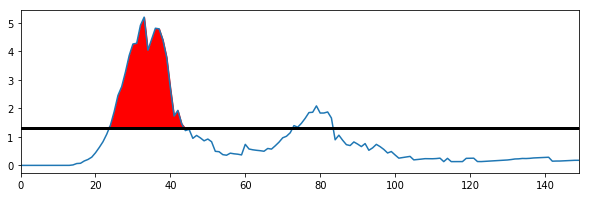

In [88]:
thr = 0.05

plt.figure(figsize=(10, 3))
plt.plot(np.arange(150), all_mlogp)

y1 = [max(elm, -np.log10(thr)) if i < 60 else -np.log10(thr) for i, elm in enumerate(all_mlogp)]

plt.fill_between(np.arange(150), y1, -np.log10(thr), color='red')

plt.axhline(-np.log10(thr), c='black', lw=3)
plt.xlim([0, 149])
plt.show()